In [1]:
# Importando as Bibiotecas
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Função de Exibição
def imshow(title = "Image", image = None, size = 8):
    w, h = image.shape[0], image.shape[1]
    aspect_ratio = w/h
    plt.figure(figsize=(size * aspect_ratio,size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.show()

## **Detecção de Canto**

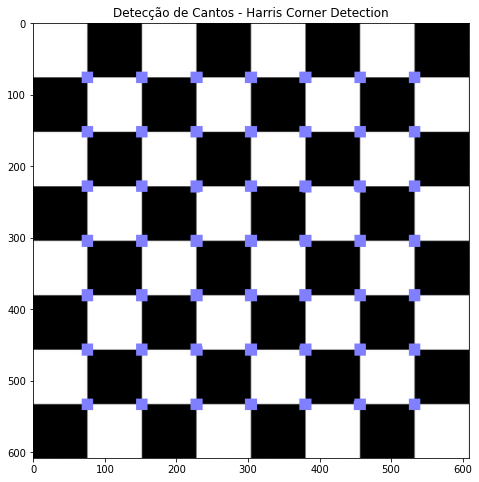

In [3]:
# Carregando Imagem
image = cv2.imread('/content/chess.JPG')
# Convertendo em Escala de Cinza
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Convertendo o tipo de dados da matriz para float32
gray = np.float32(gray)

# Aplicando o Harris Corner Detection para detecção de cantos
harris_corners = cv2.cornerHarris(gray, 3, 3, 0.05)

# Usando a dilatação dos pontos dos cantos para aumentá-los
kernel = np.ones((7,7),np.uint8)
harris_corners = cv2.dilate(harris_corners, kernel, iterations = 2)

# Limiar para um valor ideal
image[harris_corners > 0.025 * harris_corners.max() ] = [255, 127, 127]

imshow('Detecção de Cantos - Harris Corner Detection', image)

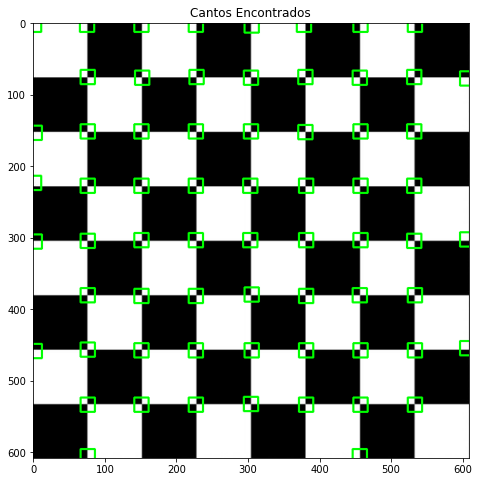

In [4]:
# Carregando Imagem
img = cv2.imread('/content/chess.JPG')
# Convertendo para Escala de Cinza
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

# Especificamos os 50 principais cantos
corners = cv2.goodFeaturesToTrack(gray, 150, 0.0005, 10)

for corner in corners:
    x, y = corner[0]
    x = int(x)
    y = int(y)
    cv2.rectangle(img,(x-10,y-10),(x+10,y+10),(0,255,0), 2)
    
imshow("Cantos Encontrados", img)